## EMPLOYEE ANALYSIS and PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df= pd.read_csv("/kaggle/input/whole-dataset/Human_Resources.csv")
employee_df=df.copy()


In [4]:
employee_df.dtypes

Age                           int64
MonthlyIncome               float64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber              float64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyRate                 float64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

In [5]:
len(employee_df.columns)

35

In [6]:
employee_df.head()

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,5993.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1.0,2,Female,94,3,2,Sales Executive,4,Single,19479.0,8,Y,Yes,11.0,3.0,1,80,0,8,0,1,6,4,0,5
1,49,NaN,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2.0,3,Male,61,2,2,Research Scientist,2,Married,24907.0,1,Y,No,23.0,4.0,4,80,1,10,3,3,10,7,1,7
2,37,2090.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4.0,4,Male,92,2,1,Laboratory Technician,3,Single,2396.0,6,Y,Yes,15.0,3.0,2,80,0,7,3,3,0,0,0,0
3,33,2909.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5.0,4,Female,56,3,1,Research Scientist,3,Married,23159.0,1,Y,Yes,11.0,3.0,3,80,0,8,3,3,8,7,3,0
4,27,3468.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7.0,1,Male,40,3,1,Laboratory Technician,2,Married,16632.0,9,Y,No,12.0,3.0,4,80,1,6,3,3,2,2,2,2


In [7]:
employee_df.tail()

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,2571.0,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061.0,3,Male,41,4,2,Laboratory Technician,4,Married,12290.0,4,Y,No,17.0,3.0,3,80,1,17,3,3,5,2,0,3
1466,39,9991.0,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062.0,4,Male,42,2,3,Healthcare Representative,1,Married,21457.0,4,Y,No,15.0,3.0,1,80,1,9,5,3,7,7,1,7
1467,27,6142.0,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064.0,2,Male,87,4,2,Manufacturing Director,2,Married,5174.0,1,Y,Yes,20.0,4.0,2,80,1,6,0,3,6,2,0,3
1468,49,5390.0,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065.0,4,Male,63,2,2,Sales Executive,2,Married,13243.0,2,Y,No,14.0,3.0,4,80,0,17,3,2,9,6,0,8
1469,34,4404.0,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068.0,2,Male,82,4,2,Laboratory Technician,3,Married,10228.0,2,Y,No,12.0,3.0,1,80,0,6,3,4,4,3,1,2


In [8]:
{i:round(employee_df[i].mean(),2) for i in employee_df.select_dtypes(include="number")}
   
    
    

{'Age': 36.92,
 'MonthlyIncome': 6505.16,
 'DailyRate': 802.49,
 'DistanceFromHome': 9.19,
 'Education': 2.91,
 'EmployeeCount': 1.0,
 'EmployeeNumber': 1025.56,
 'EnvironmentSatisfaction': 2.72,
 'HourlyRate': 65.89,
 'JobInvolvement': 2.73,
 'JobLevel': 2.06,
 'JobSatisfaction': 2.73,
 'MonthlyRate': 14310.97,
 'NumCompaniesWorked': 2.69,
 'PercentSalaryHike': 15.21,
 'PerformanceRating': 3.15,
 'RelationshipSatisfaction': 2.71,
 'StandardHours': 80.0,
 'StockOptionLevel': 0.79,
 'TotalWorkingYears': 11.28,
 'TrainingTimesLastYear': 2.8,
 'WorkLifeBalance': 2.76,
 'YearsAtCompany': 7.01,
 'YearsInCurrentRole': 4.23,
 'YearsSinceLastPromotion': 2.19,
 'YearsWithCurrManager': 4.12}

In [9]:
len(employee_df.columns)

35

In [10]:
employee_df.describe()

,Age,MonthlyIncome,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1467.000000,1470.000000,1470.000000,1470.000000,1470.0,1469.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1468.000000,1470.000000,1469.000000,1469.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,6505.155419,802.485714,9.192517,2.912925,1.0,1025.556161,2.721769,65.891156,2.729932,2.063946,2.728571,14310.966621,2.693197,15.206263,3.153165,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,4711.297846,403.509100,8.106864,1.024165,0.0,601.646166,1.093082,20.329428,0.711561,1.106940,1.102846,7121.294449,2.498009,3.659047,0.360270,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1009.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2911.000000,465.000000,2.000000,2.000000,1.0,492.000000,2.000000,48.000000,2.000000,1.000000,2.000000,8043.750000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,4908.000000,802.000000,7.000000,3.000000,1.0,1022.000000,3.000000,66.000000,3.000000,2.000000,3.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,8378.000000,1157.000000,14.000000,4.000000,1.0,1556.000000,4.000000,83.750000,3.000000,3.000000,4.000000,20463.250000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,19999.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
employee_df.agg({'Age':[np.mean,max,min]})

,Age
mean,36.92381
max,60.00000
min,18.00000


In [12]:
df_nan=employee_df[pd.isnull(employee_df).any(axis=1)]#This is a new dataframe anymore the index appeared 1 is actually 0 index
df_nan

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,NaN,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2.0,3,Male,61,2,2,Research Scientist,2,Married,24907.0,1,Y,No,23.0,4.0,4,80,1,10,3,3,10,7,1,7
6,59,NaN,No,Travel_Rarely,1324,Research & Development,3,3,NaN,1,NaN,3,NaN,81,4,1,NaN,1,Married,9964.0,4,Y,Yes,NaN,NaN,1,80,3,12,3,2,1,0,0,0
7,30,2693.0,No,Travel_Rarely,1358,NaN,24,1,Life Sciences,1,11.0,4,Male,67,3,1,Laboratory Technician,3,Divorced,13335.0,1,Y,No,22.0,4.0,2,80,1,1,2,3,1,0,0,0
17,22,2935.0,No,Non-Travel,1123,Research & Development,16,2,Medical,1,22.0,4,Male,96,4,1,Laboratory Technician,4,NaN,7324.0,1,Y,Yes,13.0,3.0,2,80,2,1,2,2,1,0,0,0
23,21,1232.0,No,Travel_Rarely,391,Research & Development,15,2,Life Sciences,1,30.0,3,Male,96,3,1,Research Scientist,4,Single,NaN,1,Y,No,14.0,3.0,4,80,0,0,6,3,0,0,0,0
103,34,4809.0,No,Travel_Rarely,665,Research & Development,6,4,Other,1,138.0,1,Female,41,3,2,Research Scientist,3,Single,NaN,1,Y,No,14.0,3.0,3,80,0,16,3,3,16,13,2,10
947,52,NaN,Yes,Travel_Rarely,1030,Sales,5,3,Life Sciences,1,1319.0,2,Male,64,3,3,Sales Executive,2,Single,21534.0,9,Y,Yes,19.0,3.0,3,80,0,10,2,2,8,7,7,7


In [13]:
index_nan=[i for i in employee_df[pd.isnull(employee_df).any(axis=1)].index]
index_nan

[1, 6, 7, 17, 23, 103, 947]

In [14]:
{"number of nan in index "+str(i):df_nan.loc[i,:].isnull().sum() for i in index_nan}#we use loc instead of iloc 
  
      

{'number of nan in index 1': 1,
 'number of nan in index 6': 7,
 'number of nan in index 7': 1,
 'number of nan in index 17': 1,
 'number of nan in index 23': 1,
 'number of nan in index 103': 1,
 'number of nan in index 947': 1}

In [15]:
employee_df.isnull().sum()

Age                         0
MonthlyIncome               3
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  1
DistanceFromHome            0
Education                   0
EducationField              1
EmployeeCount               0
EmployeeNumber              1
EnvironmentSatisfaction     0
Gender                      1
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     1
JobSatisfaction             0
MaritalStatus               1
MonthlyRate                 2
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           1
PerformanceRating           1
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [16]:
employee_df.dropna(axis=0,inplace=True)#dropping the rows including nan

In [17]:
employee_df.shape

(1463, 35)

In [18]:
[i for i in employee_df.select_dtypes(exclude='number')]#null olmayan ama missing olabilecek degerler olabilir 

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [19]:
for i in employee_df.select_dtypes(exclude='number'):#numeric olmayan sutunlardaki degerlere goz atiyoruz missing olabilecek var mi?
    print("-"*21+f"{i}"+"-"*21)
    print(employee_df[i].value_counts(),"\n")
    

---------------------Attrition---------------------
No     1227
Yes     236
Name: Attrition, dtype: int64 

---------------------BusinessTravel---------------------
Travel_Rarely        1038
Travel_Frequently     276
Non-Travel            149
Name: BusinessTravel, dtype: int64 

---------------------Department---------------------
Research & Development    955
Sales                     445
Human Resources            63
Name: Department, dtype: int64 

---------------------EducationField---------------------
Life Sciences       602
Medical             462
Marketing           159
Technical Degree    132
Other                81
Human Resources      27
Name: EducationField, dtype: int64 

---------------------Gender---------------------
Male      877
Female    586
Name: Gender, dtype: int64 

---------------------JobRole---------------------
Sales Executive              325
Research Scientist           289
Laboratory Technician        256
Manufacturing Director       145
Healthcare Represe

In [20]:
employee_df2=df.copy()
employee_df2.head()

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,5993.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1.0,2,Female,94,3,2,Sales Executive,4,Single,19479.0,8,Y,Yes,11.0,3.0,1,80,0,8,0,1,6,4,0,5
1,49,NaN,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2.0,3,Male,61,2,2,Research Scientist,2,Married,24907.0,1,Y,No,23.0,4.0,4,80,1,10,3,3,10,7,1,7
2,37,2090.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4.0,4,Male,92,2,1,Laboratory Technician,3,Single,2396.0,6,Y,Yes,15.0,3.0,2,80,0,7,3,3,0,0,0,0
3,33,2909.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5.0,4,Female,56,3,1,Research Scientist,3,Married,23159.0,1,Y,Yes,11.0,3.0,3,80,0,8,3,3,8,7,3,0
4,27,3468.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7.0,1,Male,40,3,1,Laboratory Technician,2,Married,16632.0,9,Y,No,12.0,3.0,4,80,1,6,3,3,2,2,2,2


In [21]:
index2_nan=employee_df2.isnull().sum()[employee_df2.isnull().sum()>0].index
index2_nan

Index(['MonthlyIncome', 'Department', 'EducationField', 'EmployeeNumber',
       'Gender', 'JobRole', 'MaritalStatus', 'MonthlyRate',
       'PercentSalaryHike', 'PerformanceRating'],
      dtype='object')

In [22]:
df[index2_nan].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MonthlyIncome      1467 non-null   float64
 1   Department         1469 non-null   object 
 2   EducationField     1469 non-null   object 
 3   EmployeeNumber     1469 non-null   float64
 4   Gender             1469 non-null   object 
 5   JobRole            1469 non-null   object 
 6   MaritalStatus      1469 non-null   object 
 7   MonthlyRate        1468 non-null   float64
 8   PercentSalaryHike  1469 non-null   float64
 9   PerformanceRating  1469 non-null   float64
dtypes: float64(5), object(5)
memory usage: 115.0+ KB


In [23]:
for i in index2_nan:
    print("-"*21+f"{i}"+"-"*21)
    print(employee_df2[i].value_counts(),"\n")
   

---------------------MonthlyIncome---------------------
2342.0     4
2451.0     3
2610.0     3
6142.0     3
6347.0     3
          ..
6322.0     1
7104.0     1
2773.0     1
19513.0    1
4404.0     1
Name: MonthlyIncome, Length: 1346, dtype: int64 

---------------------Department---------------------
Research & Development    960
Sales                     446
Human Resources            63
Name: Department, dtype: int64 

---------------------EducationField---------------------
Life Sciences       606
Medical             463
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 

---------------------EmployeeNumber---------------------
1.0       1
1392.0    1
1390.0    1
1389.0    1
1387.0    1
         ..
661.0     1
659.0     1
657.0     1
656.0     1
2068.0    1
Name: EmployeeNumber, Length: 1469, dtype: int64 

---------------------Gender---------------------
Male      882
Female    587
Name: Gender, dtype:

In [24]:
len(employee_df.MonthlyRate)

1463

In [25]:
[int(len(employee_df.MonthlyRate)/2)]

[731]

In [26]:
sorted(employee_df.MonthlyRate)[int(len(employee_df.MonthlyRate)/2)]

14242.0

In [27]:
np.median(employee_df.MonthlyRate)

14242.0

## Get Dummies and OneHotEncode

- **Import the Human Resources data and remove all missing values**
- **How many unique categories exist in the Education Field column?**
- **Perform one hot encoding to the Education Field column**

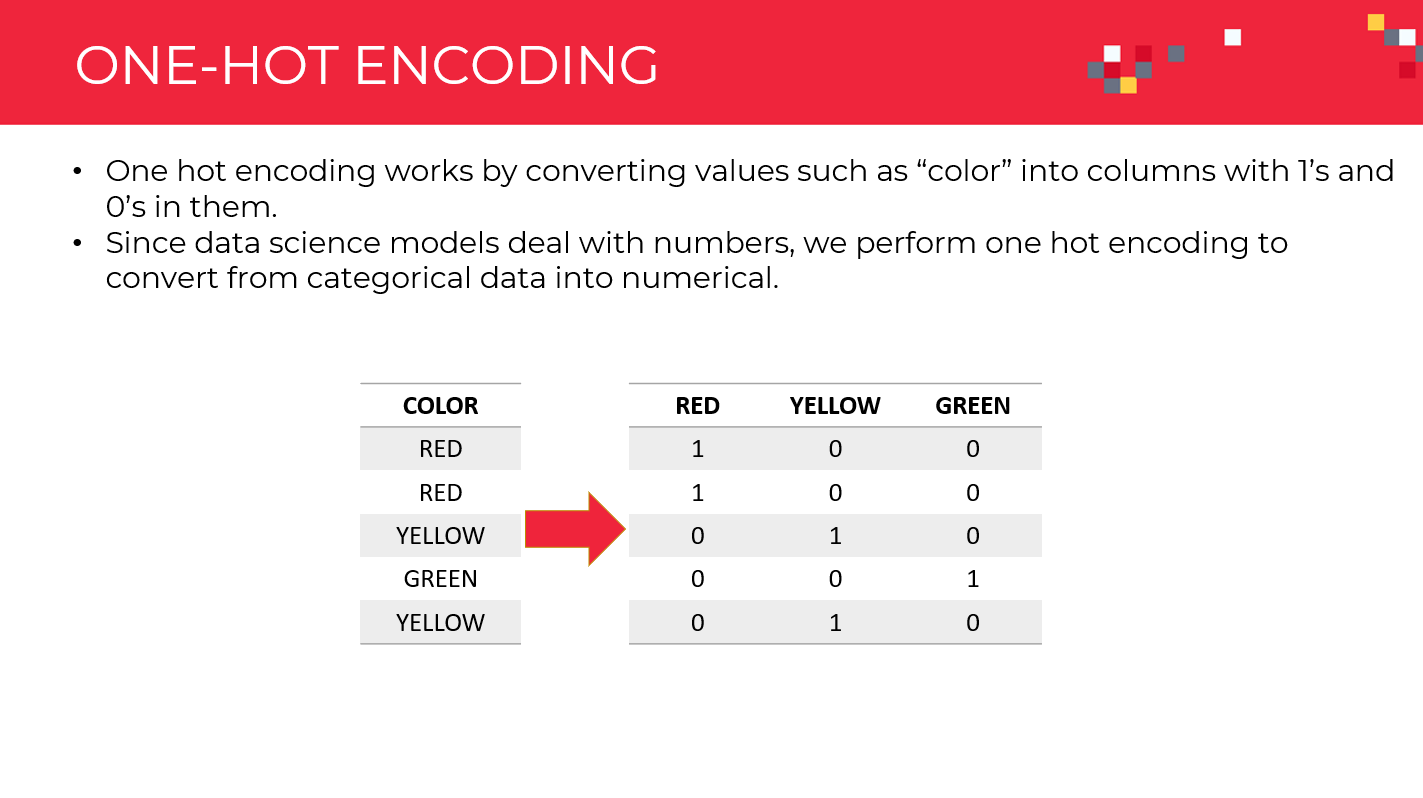

In [28]:
# Let's read a CSV file using Pandas as follows
hr_df = pd.read_csv('/kaggle/input/whole-dataset/Human_Resources.csv') #we eread our dataset from the begining
hr_df.head(5)

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,5993.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1.0,2,Female,94,3,2,Sales Executive,4,Single,19479.0,8,Y,Yes,11.0,3.0,1,80,0,8,0,1,6,4,0,5
1,49,NaN,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2.0,3,Male,61,2,2,Research Scientist,2,Married,24907.0,1,Y,No,23.0,4.0,4,80,1,10,3,3,10,7,1,7
2,37,2090.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4.0,4,Male,92,2,1,Laboratory Technician,3,Single,2396.0,6,Y,Yes,15.0,3.0,2,80,0,7,3,3,0,0,0,0
3,33,2909.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5.0,4,Female,56,3,1,Research Scientist,3,Married,23159.0,1,Y,Yes,11.0,3.0,3,80,0,8,3,3,8,7,3,0
4,27,3468.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7.0,1,Male,40,3,1,Laboratory Technician,2,Married,16632.0,9,Y,No,12.0,3.0,4,80,1,6,3,3,2,2,2,2


In [29]:
hr_df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [30]:
hr_df['BusinessTravel'].head()

0        Travel_Rarely
1    Travel_Frequently
2        Travel_Rarely
3    Travel_Frequently
4        Travel_Rarely
Name: BusinessTravel, dtype: object

In [31]:
BusinessTravel_Encoded = pd.get_dummies(hr_df['BusinessTravel'])
print(BusinessTravel_Encoded.head(20))

    Non-Travel  Travel_Frequently  Travel_Rarely
0            0                  0              1
1            0                  1              0
2            0                  0              1
3            0                  1              0
4            0                  0              1
5            0                  1              0
6            0                  0              1
7            0                  0              1
8            0                  1              0
9            0                  0              1
10           0                  0              1
11           0                  0              1
12           0                  0              1
13           0                  0              1
14           0                  0              1
15           0                  0              1
16           0                  0              1
17           1                  0              0
18           0                  0              1
19           0      

In [32]:
df1=pd.read_csv("/kaggle/input/whole-dataset/Human_Resources.csv")
hr=df1.copy()
hr1=df1.copy()
hr2=df1.copy()

In [33]:
hr.dropna(inplace=True)
hr1.dropna(inplace=True)
hr2.dropna(inplace=True)


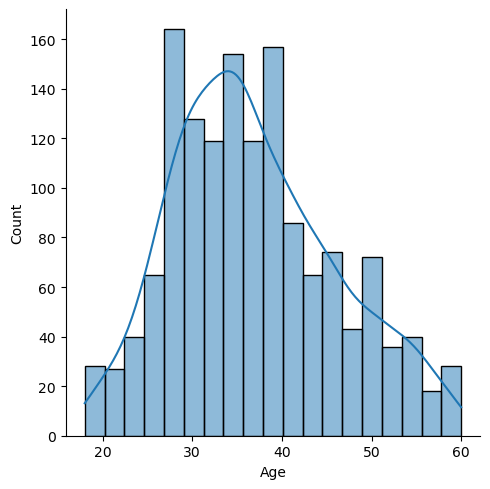

In [34]:
sns.displot(hr1,x="Age",kde=True)
plt.show()

In [35]:
hr.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [36]:
hr.EducationField.nunique()

6

In [37]:
{"index of "+str(i)+" column":list(hr.columns).index(i) for i in hr.columns}

{'index of Age column': 0,
 'index of MonthlyIncome column': 1,
 'index of Attrition column': 2,
 'index of BusinessTravel column': 3,
 'index of DailyRate column': 4,
 'index of Department column': 5,
 'index of DistanceFromHome column': 6,
 'index of Education column': 7,
 'index of EducationField column': 8,
 'index of EmployeeCount column': 9,
 'index of EmployeeNumber column': 10,
 'index of EnvironmentSatisfaction column': 11,
 'index of Gender column': 12,
 'index of HourlyRate column': 13,
 'index of JobInvolvement column': 14,
 'index of JobLevel column': 15,
 'index of JobRole column': 16,
 'index of JobSatisfaction column': 17,
 'index of MaritalStatus column': 18,
 'index of MonthlyRate column': 19,
 'index of NumCompaniesWorked column': 20,
 'index of Over18 column': 21,
 'index of OverTime column': 22,
 'index of PercentSalaryHike column': 23,
 'index of PerformanceRating column': 24,
 'index of RelationshipSatisfaction column': 25,
 'index of StandardHours column': 26,
 

In [38]:
ct=ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[8])],remainder='passthrough')#we use here two different module
hr=np.array(ct.fit_transform(hr))

In [39]:
hr1.head(1).values

array([[41, 5993.0, 'Yes', 'Travel_Rarely', 1102, 'Sales', 1, 2,
        'Life Sciences', 1, 1.0, 2, 'Female', 94, 3, 2,
        'Sales Executive', 4, 'Single', 19479.0, 8, 'Y', 'Yes', 11.0,
        3.0, 1, 80, 0, 8, 0, 1, 6, 4, 0, 5]], dtype=object)

In [40]:
hr[0]

array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 41, 5993.0, 'Yes', 'Travel_Rarely',
       1102, 'Sales', 1, 2, 1, 1.0, 2, 'Female', 94, 3, 2,
       'Sales Executive', 4, 'Single', 19479.0, 8, 'Y', 'Yes', 11.0, 3.0,
       1, 80, 0, 8, 0, 1, 6, 4, 0, 5], dtype=object)

## SCALING

In [41]:
# Let's read a CSV file using Pandas as follows
hr_df = pd.read_csv('/kaggle/input/whole-dataset/Human_Resources.csv')
hr_df.head()

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,5993.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1.0,2,Female,94,3,2,Sales Executive,4,Single,19479.0,8,Y,Yes,11.0,3.0,1,80,0,8,0,1,6,4,0,5
1,49,NaN,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2.0,3,Male,61,2,2,Research Scientist,2,Married,24907.0,1,Y,No,23.0,4.0,4,80,1,10,3,3,10,7,1,7
2,37,2090.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4.0,4,Male,92,2,1,Laboratory Technician,3,Single,2396.0,6,Y,Yes,15.0,3.0,2,80,0,7,3,3,0,0,0,0
3,33,2909.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5.0,4,Female,56,3,1,Research Scientist,3,Married,23159.0,1,Y,Yes,11.0,3.0,3,80,0,8,3,3,8,7,3,0
4,27,3468.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7.0,1,Male,40,3,1,Laboratory Technician,2,Married,16632.0,9,Y,No,12.0,3.0,4,80,1,6,3,3,2,2,2,2


In [42]:
hr_df['Age'].values

array([41, 49, 37, ..., 27, 49, 34])

In [43]:
# Normalization is conducted to make feature values range from 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
hr_df['Age'] = scaler.fit_transform(hr_df['Age'].values.reshape(-1,1))

In [44]:
hr_df['Age'].head(50)

0     0.547619
1     0.738095
2     0.452381
3     0.357143
4     0.214286
5     0.333333
6     0.976190
7     0.285714
8     0.476190
9     0.428571
10    0.404762
11    0.261905
12    0.309524
13    0.380952
14    0.238095
15    0.261905
16    0.333333
17    0.095238
18    0.833333
19    0.476190
20    0.142857
21    0.428571
22    0.380952
23    0.071429
24    0.380952
25    0.833333
26    0.333333
27    0.571429
28    0.619048
29    0.666667
30    0.357143
31    0.619048
32    0.285714
33    0.500000
34    0.142857
35    0.595238
36    0.761905
37    0.404762
38    0.428571
39    0.357143
40    0.404762
41    0.214286
42    0.190476
43    0.214286
44    0.285714
45    0.547619
46    0.380952
47    0.452381
48    0.666667
49    0.404762
Name: Age, dtype: float64

In [45]:
hr_df.describe()

,Age,MonthlyIncome,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1467.000000,1470.000000,1470.000000,1470.000000,1470.0,1469.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1468.000000,1470.000000,1469.000000,1469.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.450567,6505.155419,802.485714,9.192517,2.912925,1.0,1025.556161,2.721769,65.891156,2.729932,2.063946,2.728571,14310.966621,2.693197,15.206263,3.153165,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.217509,4711.297846,403.509100,8.106864,1.024165,0.0,601.646166,1.093082,20.329428,0.711561,1.106940,1.102846,7121.294449,2.498009,3.659047,0.360270,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,1009.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,2911.000000,465.000000,2.000000,2.000000,1.0,492.000000,2.000000,48.000000,2.000000,1.000000,2.000000,8043.750000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.428571,4908.000000,802.000000,7.000000,3.000000,1.0,1022.000000,3.000000,66.000000,3.000000,2.000000,3.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.595238,8378.000000,1157.000000,14.000000,4.000000,1.0,1556.000000,4.000000,83.750000,3.000000,3.000000,4.000000,20463.250000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,19999.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


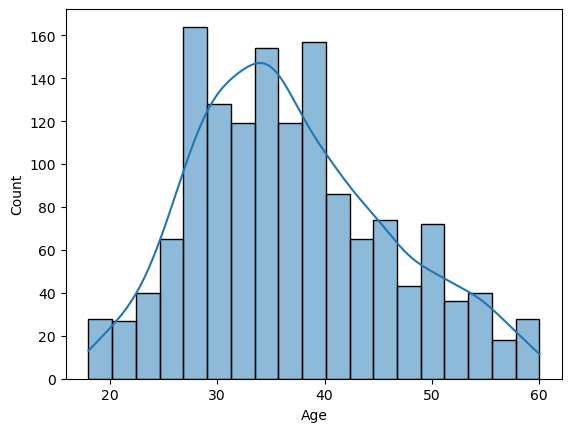

In [46]:
sns.histplot(x = "Age", data = hr1,kde=True) #comparing scaled and non-scaled Age distributions
plt.show()

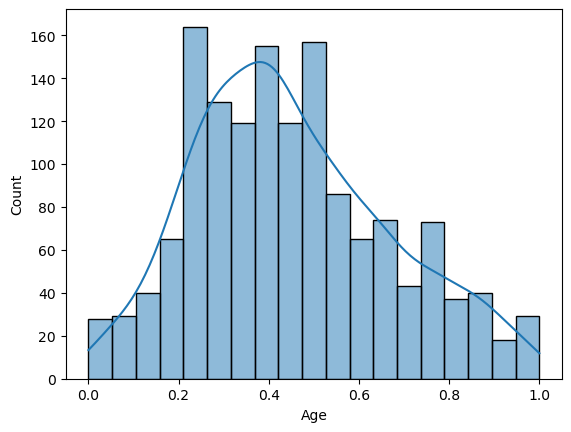

In [47]:
sns.histplot(x = "Age", data = hr_df,kde=True)
plt.show()